
## Case Study: A better Smoker Detector

**Objective:**

In this notebook, you will work on the insurance csv file. Your goal is not only to make a prediction, it is to make a prediction with the best possible way. So you will be building, evaluating, and improving your model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.

In [1]:
!pip3 install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#### Read & visualize data
Let's load the **insurance.csv** dataset to our code, using **pandas** module, more specifically, the **read_csv** function.

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


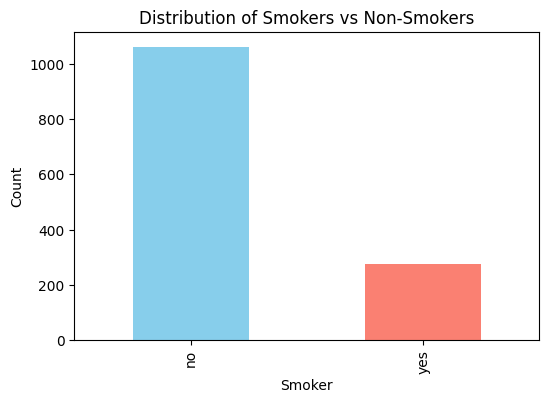

In [5]:

df['smoker'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], figsize=(6,4))
plt.title('Distribution of Smokers vs Non-Smokers')
plt.ylabel('Count')
plt.xlabel('Smoker')
plt.show()


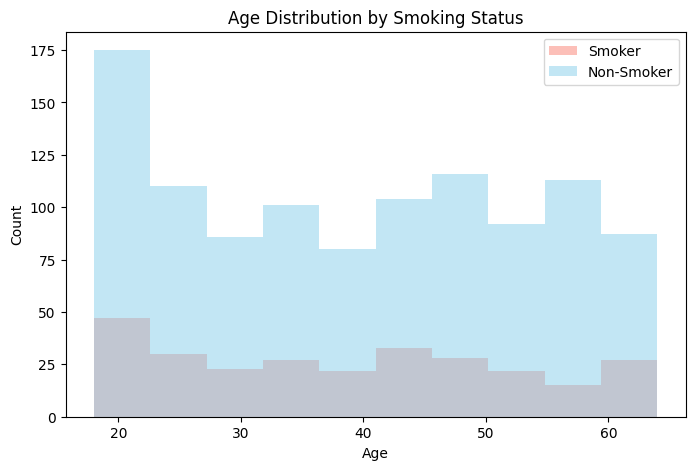

In [6]:

plt.figure(figsize=(8, 5))
plt.hist(df[df['smoker'] == 'yes']['age'], bins=10, alpha=0.5, label='Smoker', color='salmon')
plt.hist(df[df['smoker'] == 'no']['age'], bins=10, alpha=0.5, label='Non-Smoker', color='skyblue')
plt.legend(loc='upper right')
plt.title('Age Distribution by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


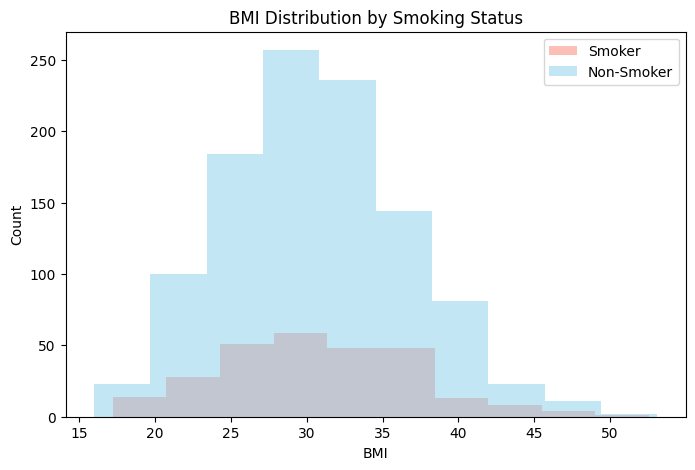

In [7]:

plt.figure(figsize=(8, 5))
plt.hist(df[df['smoker'] == 'yes']['bmi'], bins=10, alpha=0.5, label='Smoker', color='salmon')
plt.hist(df[df['smoker'] == 'no']['bmi'], bins=10, alpha=0.5, label='Non-Smoker', color='skyblue')
plt.legend(loc='upper right')
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


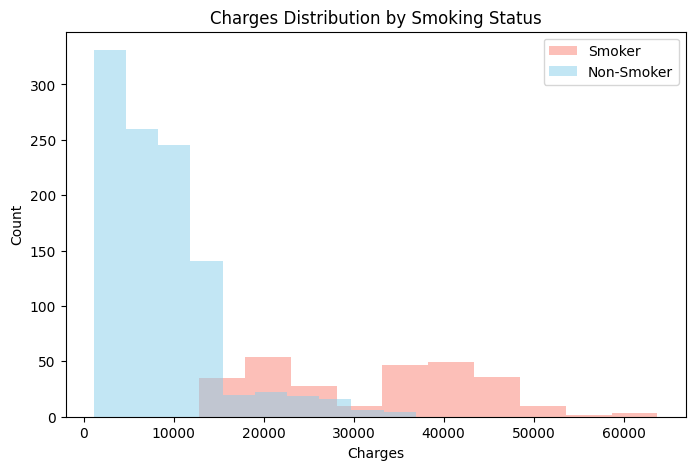

In [8]:

plt.figure(figsize=(8, 5))
plt.hist(df[df['smoker'] == 'yes']['charges'], bins=10, alpha=0.5, label='Smoker', color='salmon')
plt.hist(df[df['smoker'] == 'no']['charges'], bins=10, alpha=0.5, label='Non-Smoker', color='skyblue')
plt.legend(loc='upper right')
plt.title('Charges Distribution by Smoking Status')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Question 1:** how many rows & columns in our dataset

In [9]:
rows, columns = df.shape

print(f"Number of rows : {rows}")
print(f"Number of columns : {columns}")

Number of rows : 1338
Number of columns : 7


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1335.0,30.661423,6.101038,15.9600,26.30250,30.400,34.687500,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

**Question 2:** Select the instances where the data.smoker == "yes" and the ones where the data.smoker == "no". Save them in smokers and non_smokers dataframes respectively. Then count how many you have in each category.

In [12]:
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']

In [13]:
num_smokers = smokers.shape[0]
num_non_smokers = non_smokers.shape[0]

In [14]:
print(f"Number of smokers : {num_smokers}")
print(f"Number of non-smokers  : {num_non_smokers}")

Number of smokers : 274
Number of non-smokers  : 1064


**Question 3:** Is your data balanced?

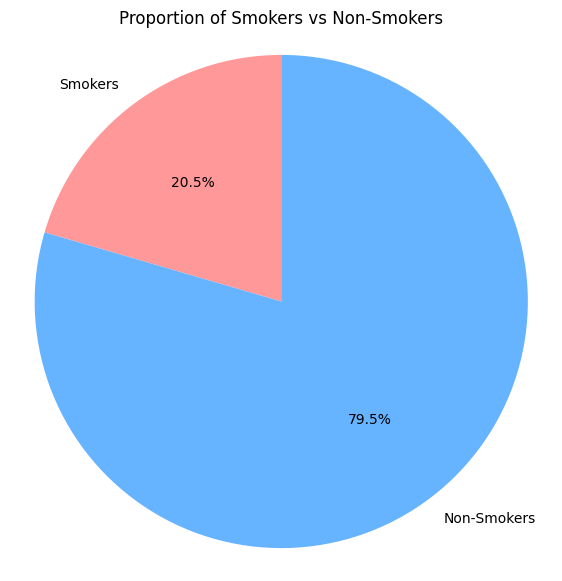

In [15]:
import matplotlib.pyplot as plt


labels = ['Smokers', 'Non-Smokers']
sizes = [num_smokers, num_non_smokers]
colors = ['#ff9999','#66b3ff']


plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Smokers vs Non-Smokers')
plt.axis('equal')  
plt.show()


- The chart shows that 79.5% of the data represents non-smokers,
- while 20.5% represents smokers,

- indicating an **imbalance** between the two groups in the dataset.

### Exploratory Data Analysis

Let's start by seeing how much each feature tells us about a person being  a smoker or not.

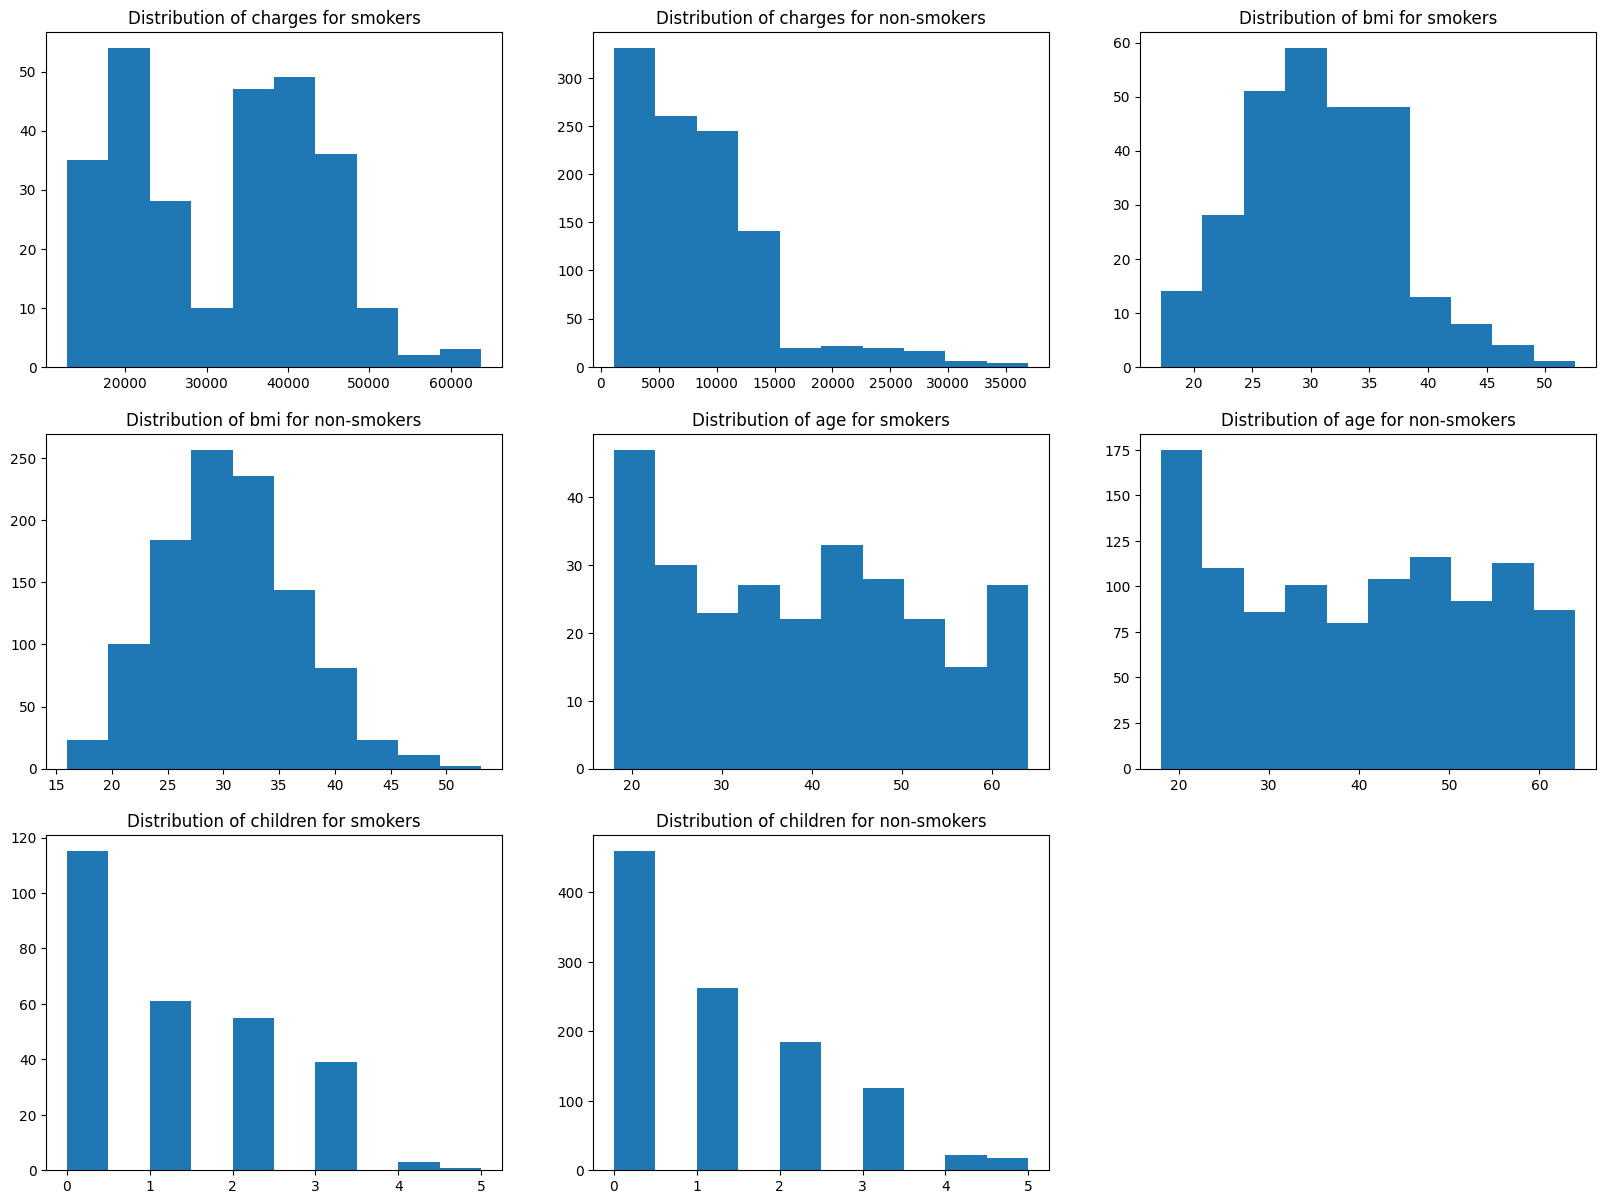

In [16]:
numerical_features = ['charges', 'bmi', 'age', 'children']

subplot_number = 431
fig = plt.figure(figsize=(20,20))

for f in numerical_features:

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(smokers[f])
  ax.set_title('Distribution of ' + f + ' for smokers')

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(non_smokers[f])
  ax.set_title('Distribution of '+ f + ' for non-smokers')

**Question 4:** From the above histograms, deduce which feature tells us the most about a person being smoker or not?

From the histograms, it can be concluded **that medical charges (charges)** provide the most information about whether a person is a smoker or not. The distribution of charges for smokers shows significantly higher values compared to non-smokers, indicating that smokers tend to incur much higher medical costs. Therefore, this feature gives the strongest distinction between smokers and non-smokers.

Now let's see if the gender influences being a smoker or not.

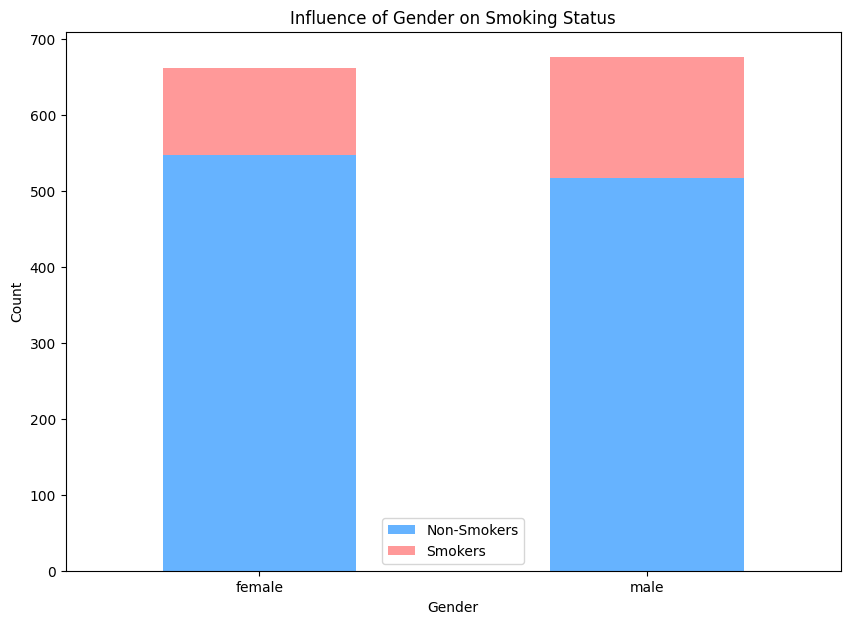

In [17]:
gender_smoker_pivot = pd.crosstab(df['sex'], df['smoker'])

gender_smoker_pivot.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'], figsize=(10,7))

plt.title('Influence of Gender on Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Non-Smokers', 'Smokers'])
plt.xticks(rotation=0)
plt.show()

**Question 5:** What can you conclude about the gender and the smoker status?

The chart illustrates the distribution of smokers and non-smokers based on gender (female and male).

**Key points:**
-   The x-axis represents gender: female and male.
-   The y-axis represents the count of individuals in each category.
-   The stacked bar chart shows the blue portion for non-smokers and the red portion for smokers.

**Observations:**
-   The proportion of smokers between males and females appears to be similar, as the red segments (smokers) for both genders are nearly the same size.
-   Overall, it seems that gender does not have a significant impact on smoking status, as the distribution of smokers and non-smokers is almost equal between males and females.

**Conclusion:**
Based on the chart, we can conclude that **gender does not seem to have a clear influence** on whether a person is a smoker or not, as the proportions of smokers and non-smokers are quite similar for both genders.

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by removing missing data.

**Question 6:** How many missing value are there in each column?

In [18]:
# print how many missing value in each column
missing_values = df.isnull().sum()
print("Missing Values: \n", missing_values)

Missing Values: 
 age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64


In [19]:
# drop rows with missing values
df = df.dropna()
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1335 rows x 7 columns]


Let's drop rows with missing values

#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



**Question 7:**


*   Replace male and female with 0 and 1
*   Replace smoker and non smoker represented by yes and no in the dataframe with 0 and 1



In [20]:
# define dictionary
sex_dict = {'male': 1, 'female': 0}

# replace sex column with 0/1
df['sex'] = df['sex'].map(sex_dict)

# print head to verify
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


And now the smokers column

In [21]:
# define dictionary
smokers = {'no':0, 'yes':1}

# replace smokers column with 0/1
df['smoker'] = df['smoker'].map(smokers)

# print head to verify
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


And now the Region Column

In [22]:
# define dictionary
regions = {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}

# replace region column with the corresponding values
df['region'] = df['region'].map(regions)

# print head to verify
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


#### Normalization

**Question 8:** Let's scale all the columns by dividing by the maximum

In [23]:
# get the max of each column
max_values = df.max()


In [24]:
# divide each column by its maximum value
df_normalized = df / max_values


In [25]:
# print head to verify
df_normalized.head()

,age,sex,bmi,children,smoker,region,charges
0,0.296875,0.0,0.525127,0.0,1.0,0.000000,0.264777
1,0.281250,1.0,0.635611,0.2,0.0,0.333333,0.027059
2,0.437500,1.0,0.621118,0.6,0.0,0.333333,0.069773
3,0.515625,1.0,0.427348,0.0,0.0,0.666667,0.344744
4,0.500000,1.0,0.543572,0.0,0.0,0.666667,0.060637


## 4. Model Training & Testing



#### Data splits

**Question 9:** Before training, we need to split data into training (80%) & testing (20%)

In [26]:
from sklearn.model_selection import train_test_split

# Define independent variables X and target variable y
X = df_normalized.drop('smoker', axis=1)  # Independent variables (excluding the 'smoker' column)
y = df_normalized['smoker']  # Target variable (the 'smoker' column)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the dimensions of the split data
print(X_train.shape, X_test.shape)


(1068, 6) (267, 6)


#### Logistic Regression Modeling


In [27]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

#### Evaluation

In [28]:
from sklearn.metrics import accuracy_score

# Predict values using the test data
y_pred = model.predict(X_test)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Logistic Regression model: {accuracy * 100:.2f}%")


Accuracy of the Logistic Regression model: 89.89%


We can see that the recall, and the f1 score can be improved.

**Question 10:** What can you do to improve results?

## 5. Model Improvement

Now we will try to improve the model that we built.

#### Handle data Imbalance

<Axes: >

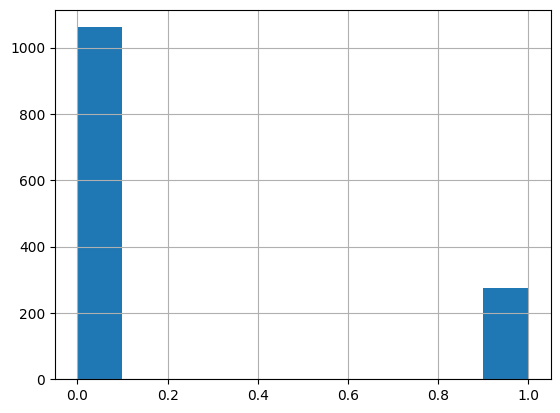

In [29]:
df['smoker'].hist()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [30]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print(f"Before resampling: {y_train.value_counts()}")
print(f"After resampling: {pd.Series(y_resampled).value_counts()}")


Before resampling: smoker
0.0    859
1.0    209
Name: count, dtype: int64
After resampling: smoker
0.0    859
1.0    859
Name: count, dtype: int64


**Summary**: The code addresses the issue of class imbalance using SMOTE, which helps improve the model's performance in handling the minority class. After applying SMOTE, synthetic samples are generated for the minority class to achieve balance between the classes.

In [31]:
# Apply undersampling to balance the classes
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print(f"Before undersampling: {y_train.value_counts()}")
print(f"After undersampling: {pd.Series(y_resampled).value_counts()}")


Before undersampling: smoker
0.0    859
1.0    209
Name: count, dtype: int64
After undersampling: smoker
0.0    209
1.0    209
Name: count, dtype: int64


**Summary**: The code reduces the number of samples in the majority class to achieve class balance. This helps the model handle balanced data more effectively, as it reduces the influence of the majority class on the model and improves the model's performance in classifying the minority class.

In [32]:
# Re-train the Logistic Regression model on the resampled data
model.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
y_pred_resampled = model.predict(X_test)

# Check the accuracy and other evaluation metrics
accuracy = accuracy_score(y_test, y_pred_resampled)
print(f"Accuracy after resampling: {accuracy * 100:.2f}%")


Accuracy after resampling: 97.00%


1. Re-training the Model:
-   The logistic regression model is re-trained using the resampled data (X_resampled, y_resampled) that has been balanced either through undersampling or oversampling.

2. Making Predictions on the Test Set:

-   After retraining the model, predictions (y_pred_resampled) are made on the test set (X_test).

3. Calculating Accuracy:

-   The accuracy of the model is calculated using accuracy_score by comparing the predictions to the true labels (y_test).
-   The accuracy is printed as a percentage, rounded to two decimal places.

**Purpose:**

The purpose of the code is to evaluate the effect of handling class imbalance (via undersampling or oversampling) on the model’s performance. You can compare this new accuracy to the previous one to see if the class balancing has improved the model's performance.

We can see how much our scores got better when we balanced our dataset.